In [1]:
import numpy as np
import cv2

In [2]:
from car_classifier import CarClassifier
from car_detector import CarDetector
clf = CarClassifier.restore('classifier_svc.pkl')
detector = CarDetector(clf)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# debug functions to easily display a test image
def display_to(img, dst):
    if len(img.shape) == 3 and img.shape[2] == 3:
        dst.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    elif len(img.shape) == 3 and img.shape[2] == 1:
        dst.imshow(img[:,:,0],cmap='gray')
    else:
        dst.imshow(img, cmap='hot')

def display_image(img):
    plt.figure(figsize=(20,10))
    display_to(img, plt)
    plt.axis('off')
    plt.show()
    
def display_images(left, right, l_title='', r_title='', main_title=''):
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,6))  
    display_to(left, axes[0])
    display_to(right, axes[1])
    axes[0].set_title(l_title)
    axes[1].set_title(r_title)
    fig.suptitle(main_title)
    for ax in axes:
        ax.axis('off')
    plt.show()
    
def display_image_grid(imgs, titles, cols, rows, size=(20,20)):
    fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=size)  
    ax_list = axes.flatten()
    
    for idx, img in enumerate(imgs):
        display_to(img, ax_list[idx])
        ax_list[idx].set_title(titles[idx])
        ax_list[idx].axis('off')
    plt.show()

In [25]:
img = cv2.imread('test_images/test1.jpg')

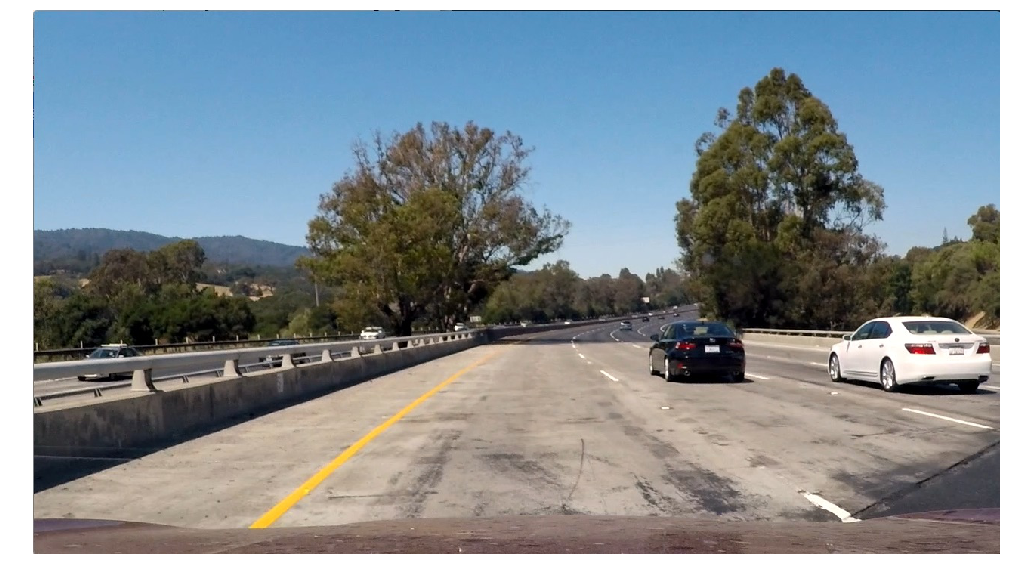

In [26]:
display_image(img)

In [27]:
import glob

images = []
titles = []

for filename in glob.glob('test_images/*.jpg'):
    img = cv2.imread(filename)
    detector.run(img)
    images.append(detector.draw_detected_rects(img))
    titles.append(filename)  

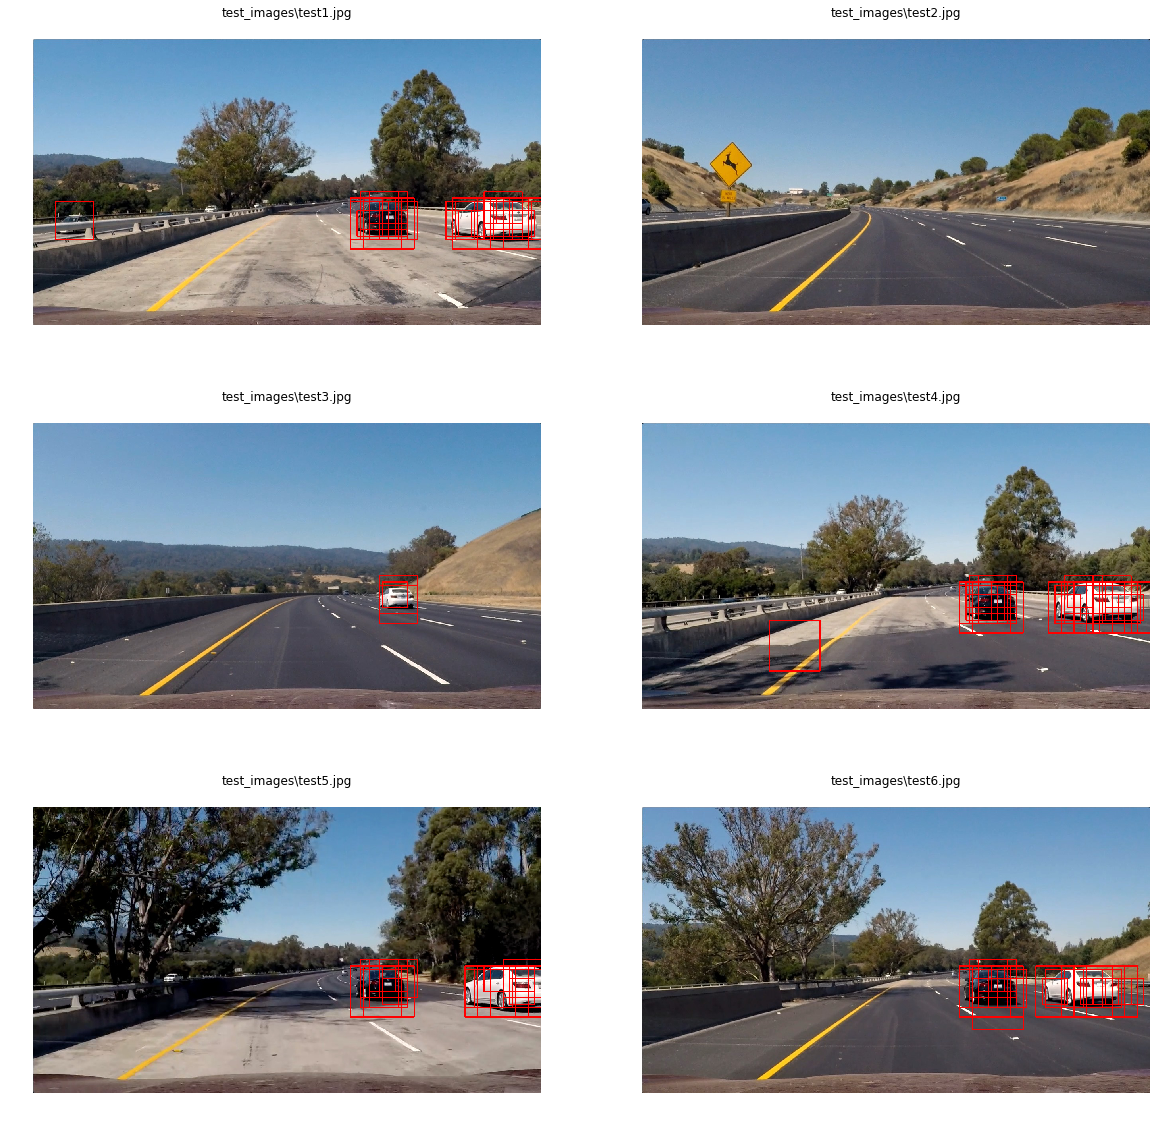

In [28]:
display_image_grid(images, titles, 2, 3)

In [42]:
import glob

images = []
titles = []

for filename in glob.glob('test_images/*.jpg'):
    img = cv2.imread(filename)
    detector.clear_heatmaps()
    detector.run(img)
    images.append(detector.draw_detected_rects(img))
    images.append(detector.heatmap)
    titles.append(filename)  
    titles.append(filename + ' heat')

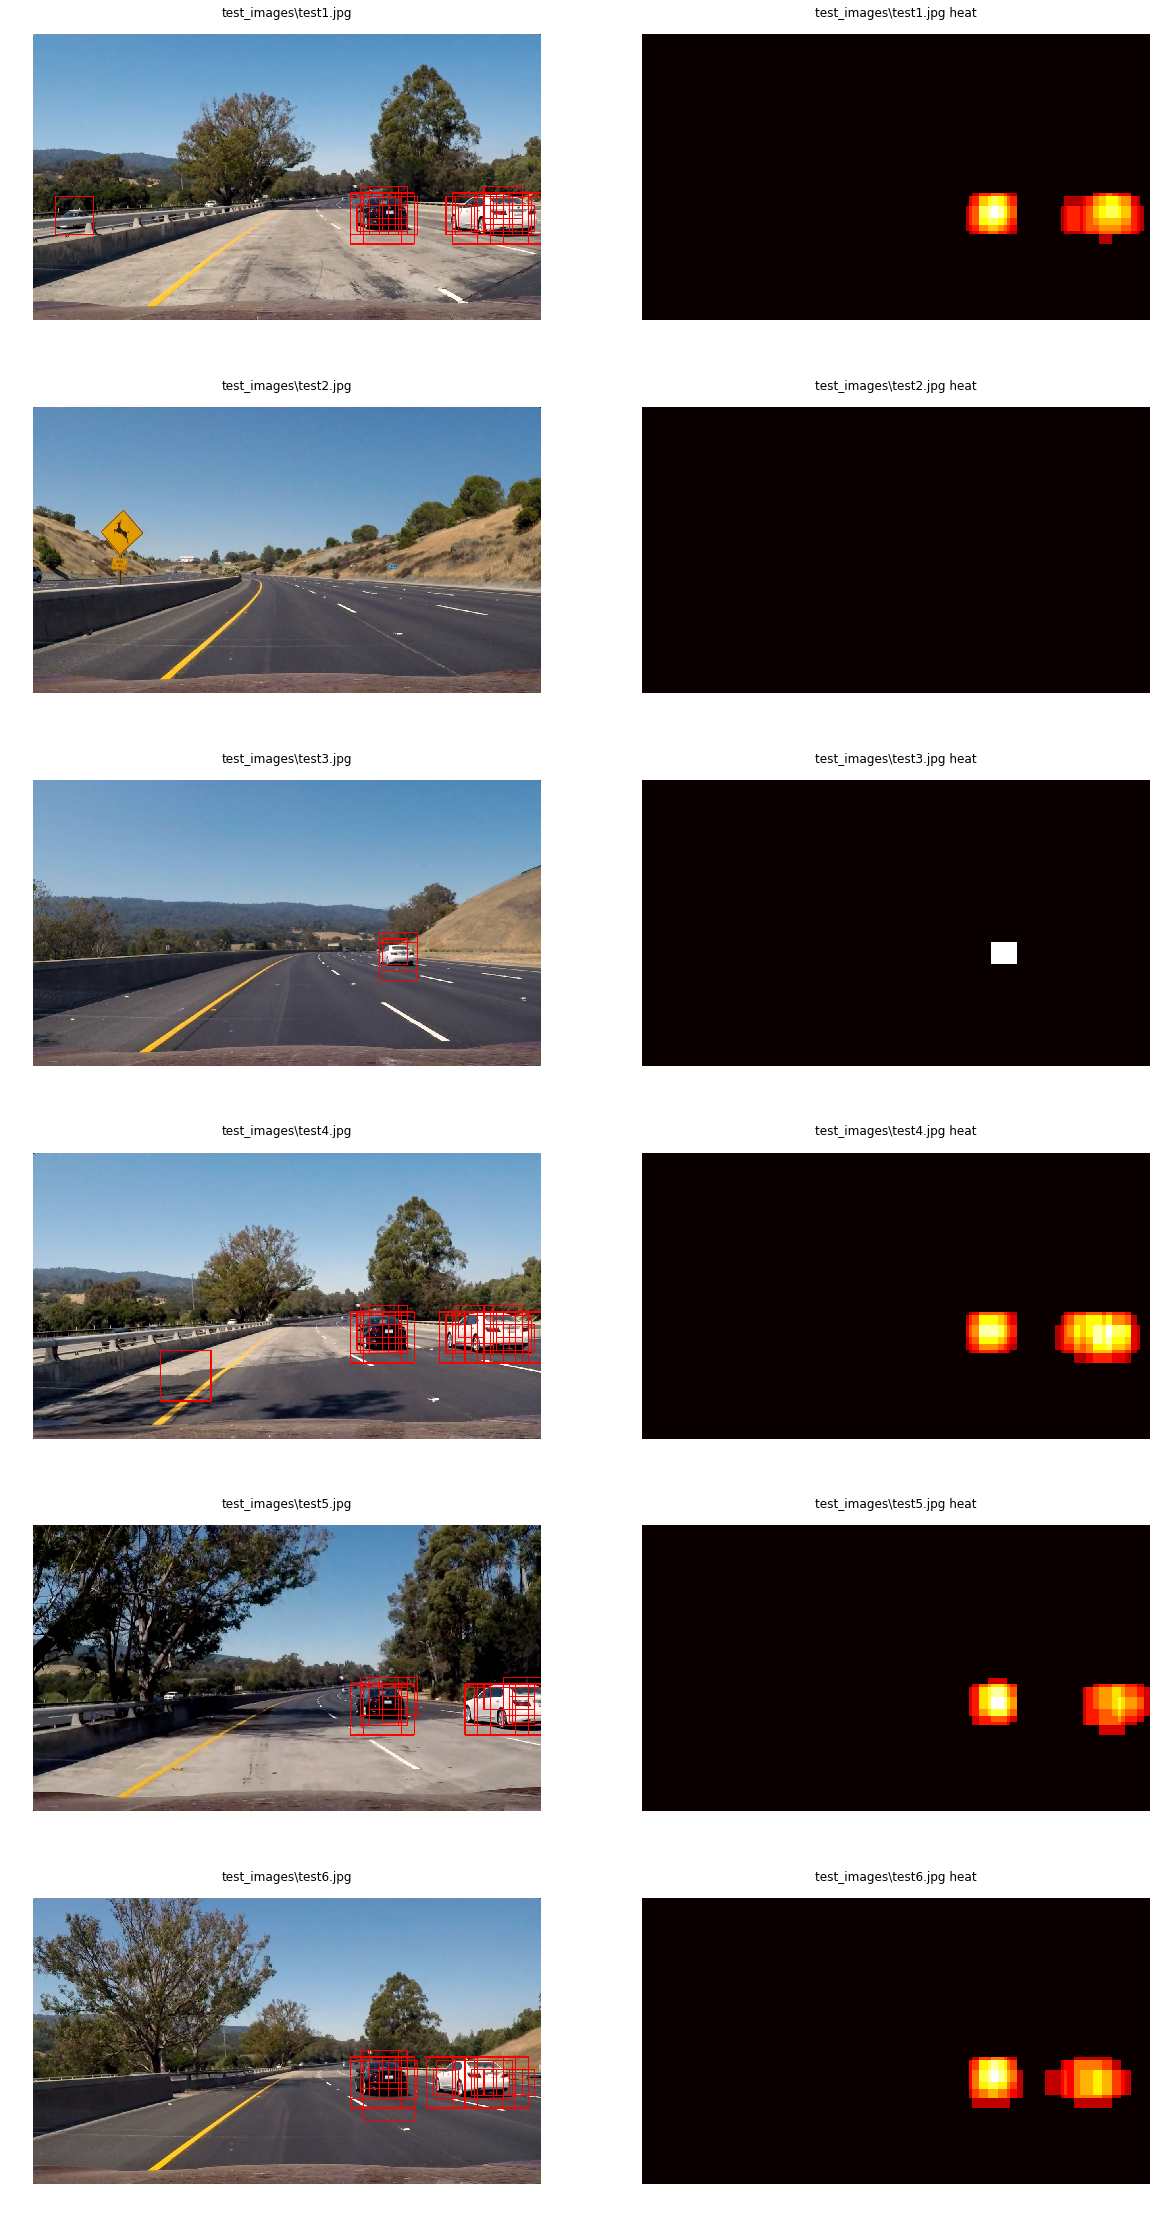

In [43]:
display_image_grid(images, titles, 2, 6, (20,40))

In [44]:
from scipy.ndimage.measurements import label

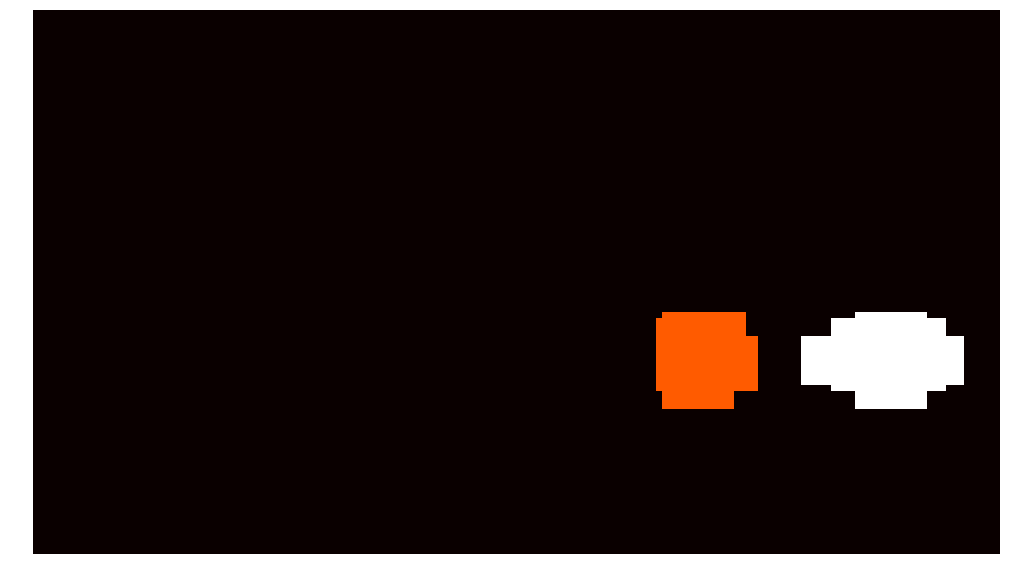

In [46]:
labels = label(images[-1])
display_image(labels[0])

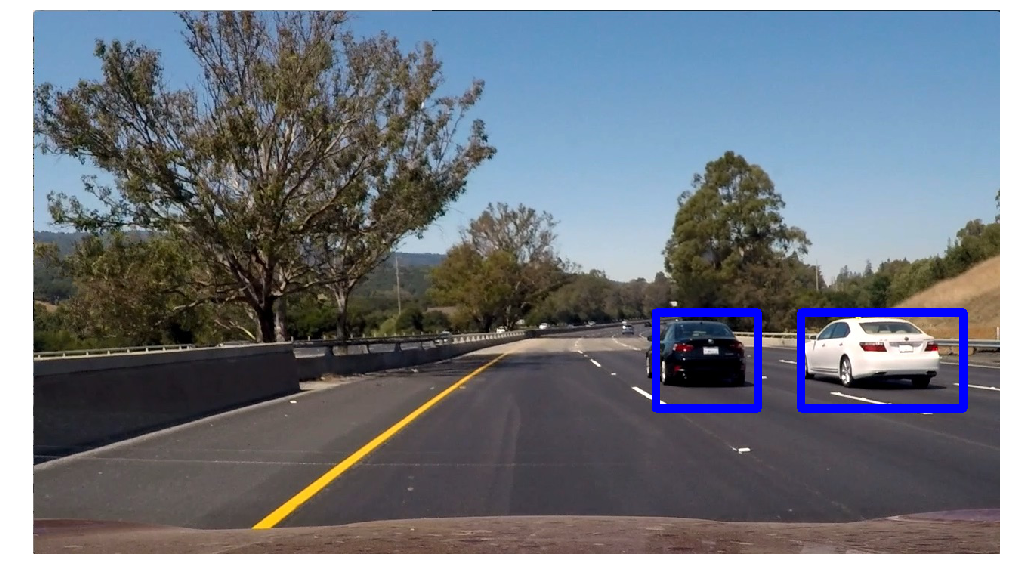

In [50]:
img = cv2.imread('test_images/test6.jpg')
display_image(detector.draw_car_rects(img))